In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
all_embeddings = np.load('Saved_embeddings_01_11_2023/all_scaled.npy')
chem_embeddings = np.load('Saved_embeddings_01_11_2023/chem_scaled.npy')
social_embeddings = np.load('Saved_embeddings_01_11_2023/social_scaled.npy')
untrained_embeddings = np.load('Saved_embeddings_01_11_2023/untrained_scaled.npy')

all_svd = getSVD(all_embeddings, log = True)
chem_svd = getSVD(chem_embeddings, log = True)
social_svd = getSVD(social_embeddings, log = True)
untrained_svd = getSVD(untrained_embeddings, log = True)


In [5]:
def getSVD(X, s_only = True, log = False):
    # Assuming you have a dataset X with rows as instances and columns as features
    # Compute the mean of each feature
    mean = np.mean(X, axis=0)
    # Center the data
    X_centered = X - mean
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    A = covariance_matrix
    U, s, VT = np.linalg.svd(A)
    if s_only:
        if log == True:
            s = np.log(s)
        return s
    return U, s

In [23]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

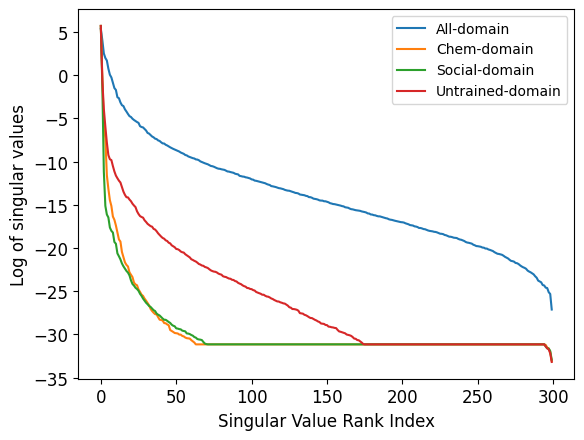

In [24]:

plt.plot(all_svd, label = 'All-domain')
plt.plot(chem_svd, label = 'Chem-domain')
plt.plot(social_svd, label = 'Social-domain')
plt.plot(untrained_svd, label = 'Untrained-domain')

plt.xlabel('Singular Value Rank Index')
plt.ylabel('Log of singular values')

plt.legend()